**Contributors**: Yongbum Kim, Yeonwoo Kim, Seyeon Jeon

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

os.chdir('/content/drive/MyDrive/DSO530Public/Homework/02')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Understanding the Simple Linear Regression Model

Assume the following model:
$Y_i = 10.0 + 0.5X_i + \epsilon_i$, $\epsilon_i \stackrel{i.i.d.}{\sim} N(0,1)$

# (a) E[Y|X = 0] = ?, E[Y|X = −1] = ?, var[Y|X] = ?

In [ ]:
import numpy as np
from scipy import stats

# Given model: Y_i = 10.0 + 0.5 * X_i + ε_i, ε_i ~ N(0, 1)
def e_y_given_x(x):
    return 10.0 + 0.5 * x

# (a) E[Y|X=0], E[Y|X=-1], var[Y|X]
print(f"E[Y|X=0] = {e_y_given_x(0)}")
print(f"E[Y|X=-1] = {e_y_given_x(-1)}")
print(f"var[Y|X] = 1")  # Since ε_i ~ N(0, 1)

E[Y|X=0] = 10.0
E[Y|X=-1] = 9.5
var[Y|X] = 1


## (b) What is the probability of Y > 10, given X = 2 ?

In [ ]:
# (b) P(Y > 10 | X = 2)
mean_y_given_x2 = e_y_given_x(2)
p_y_gt_10_given_x2 = 1 - stats.norm.cdf(10, loc=mean_y_given_x2, scale=1)
print(f"P(Y > 10 | X = 2) = {p_y_gt_10_given_x2:.4f}")

P(Y > 10 | X = 2) = 0.8413


## (c) If X has a mean of zero and variance of 20, what are E[Y] and Var(Y)?

In [ ]:
# (c) E[Y] and Var(Y) given E[X] = 0 and Var(X) = 20
e_y = e_y_given_x(0)  # Since E[X] = 0
var_y = 20 * 0.5**2 + 1  # Var(Y) = Var(β₁X) + Var(ε) = β₁²Var(X) + σ²
print(f"E[Y] = {e_y}")
print(f"Var(Y) = {var_y}")

E[Y] = 10.0
Var(Y) = 6.0


## (d) What is Cov(X, Y )?

In [ ]:
# (d) Cov(X, Y)
cov_xy = 0.5 * 20  # Cov(X, Y) = β₁ * Var(X)
print(f"Cov(X, Y) = {cov_xy}")

Cov(X, Y) = 10.0


# Simulation from the SLR Model

Generate $n = 100$ samples of $X \sim N(0,\sigma^2_X)$, with $\sigma^2_X = 2$. For each draw, simulate $Y_i$ from the simple linear regression model $Y_i = 2.5 - 1.0X_i + \epsilon_i$, where $\epsilon_i \stackrel{iid}{\sim} N(0,\sigma^2_\epsilon)$, with $\sigma^2_\epsilon = 3$.


## (a) Show the scatter plot of Y versus X along with the true regression line.

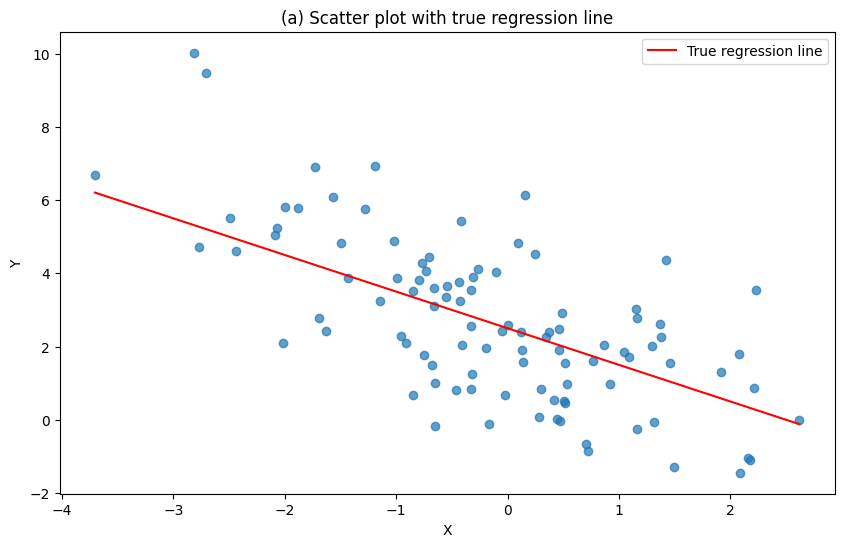

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
n = 100
sigma_x = np.sqrt(2)
X = np.random.normal(0, sigma_x, n)
epsilon = np.random.normal(0, np.sqrt(3), n)
Y = 2.5 - 1.0 * X + epsilon

# (a) Scatter plot with true regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7)
x_line = np.linspace(X.min(), X.max(), 100)
y_line = 2.5 - 1.0 * x_line
plt.plot(x_line, y_line, 'r', label='True regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('(a) Scatter plot with true regression line')
plt.show()

## (b) Split the sample into 2 subsets of size 25 and 75. For each subset, run the regression of Y on X. Add each fitted regression line (use color) to your plot from (a). Why are they not the same?

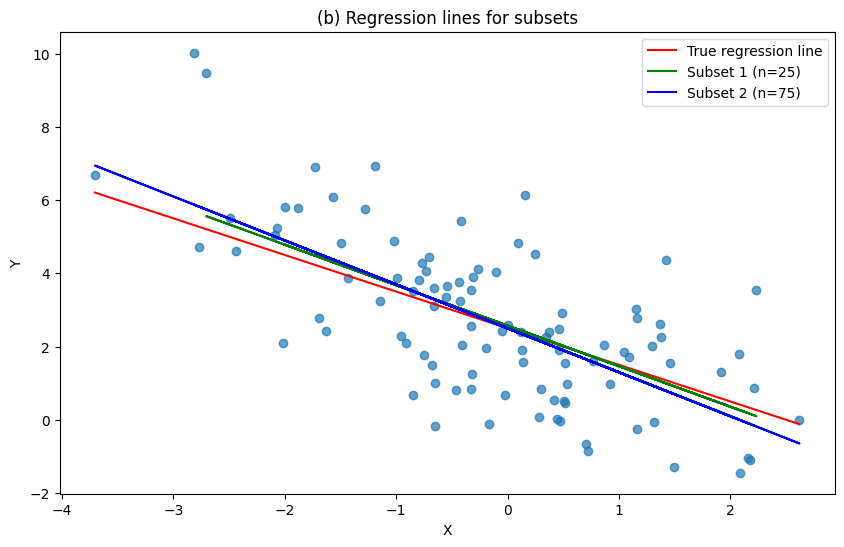

In [ ]:
# (b) Split sample and fit regressions
def fit_regression(X, Y):
    return np.polyfit(X, Y, 1)

X1, Y1 = X[:25], Y[:25]
X2, Y2 = X[25:], Y[25:]

b1_1, b0_1 = fit_regression(X1, Y1)
b1_2, b0_2 = fit_regression(X2, Y2)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7)
plt.plot(x_line, y_line, 'r', label='True regression line')
plt.plot(X1, b0_1 + b1_1 * X1, 'g', label='Subset 1 (n=25)')
plt.plot(X2, b0_2 + b1_2 * X2, 'b', label='Subset 2 (n=75)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('(b) Regression lines for subsets')
plt.show()

The regression lines for the two subsets (size 25 and size 75) differ due to:

1. Sample Size Differences

  - **n = 25 subset:**
    - Fewer data points
    - More sensitive to random variations
    - Higher variability in estimated coefficients (β₀ and β₁)
  - **n = 75 subset:**
    - More data points
    - More stable and reliable parameter estimates
    - Closer to the true regression line

2. Random Sampling Variability

  - Each subset is a different random sample
  - Differences in sample means, variances of X and Y, and their covariance
  - Affects slope (β₁) and intercept (β₀) of regression lines

3. True vs. Subset Regression Lines

  - True line: represents population relationship
  - Subset lines: based on limited samples
  - Subset lines deviate due to sampling error

4. Impact of Outliers or Extreme Values

  - Smaller subsets (n = 25): outliers have larger influence
  - Larger subsets (n = 75): outliers have less impact

**Summary**
Differences arise because smaller samples are more prone to variability and less representative of the overall population. Larger samples provide more stable and accurate estimates, which is why the n = 75 subset produces a regression line closer to the true regression line compared to n = 25.

## (c) What is the marginal sample mean for Y ? What is the true marginal mean?

In [ ]:
# (c) Marginal sample mean and true marginal mean
sample_mean_Y = np.mean(Y)
true_mean_Y = 2.5  # E[Y] = β₀ + β₁E[X], where E[X] = 0
print(f"(c) Sample marginal mean of Y: {sample_mean_Y:.4f}")
print(f"    True marginal mean of Y: {true_mean_Y:.4f}")

(c) Sample marginal mean of Y: 2.6855
    True marginal mean of Y: 2.5000


## (d) Start a fresh scatter plot of Y versus X and add the true regression line and the estimated version (using the full sample).

In [ ]:
# Fit regression
b1, b0 = np.polyfit(X, Y, 1)
Y_pred = b0 + b1 * X
residuals = Y - Y_pred
s = np.sqrt(np.sum(residuals**2) / (n - 2))

def prediction_interval(X_new, X, Y, alpha=0.1):
    X_mean = np.mean(X)
    SXX = np.sum((X - X_mean)**2)
    se = s * np.sqrt(1 + 1/n + (X_new - X_mean)**2 / SXX)
    t_value = stats.t.ppf(1 - alpha/2, n - 2)
    return t_value * se

### (i) Add the bounds of the 90% prediction interval to your plot.

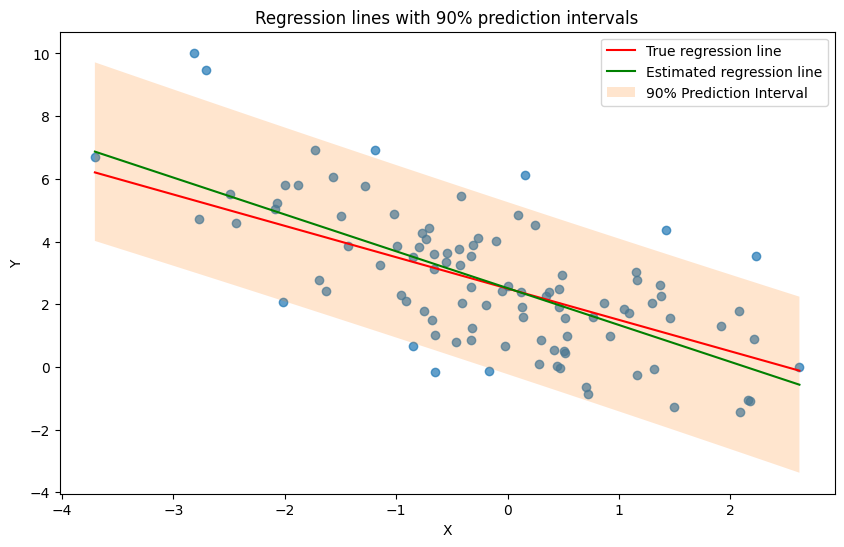

In [ ]:
# (i) Plot the data, estimated regression line, and 90% prediction intervals
x_line = np.linspace(X.min(), X.max(), 100)
PI = prediction_interval(x_line, X, Y)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7)
plt.plot(x_line, 2.5 - 1.0 * x_line, 'r', label='True regression line')
plt.plot(x_line, b0 + b1 * x_line, 'g', label='Estimated regression line')
plt.fill_between(x_line, b0 + b1 * x_line - PI, b0 + b1 * x_line + PI, alpha=0.2, label='90% Prediction Interval')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Regression lines with 90% prediction intervals')
plt.show()

### (ii) What percentage of your observations are outside of this interval?

In [ ]:
# (ii) Calculate percentage of observations outside the interval
PI_observed = prediction_interval(X, X, Y)
outside_interval = np.sum((Y < b0 + b1 * X - PI_observed) | (Y > b0 + b1 * X + PI_observed))
percentage_outside = outside_interval / n * 100
print(f"Percentage of observations outside the 90% prediction interval: {percentage_outside:.2f}%")

Percentage of observations outside the 90% prediction interval: 10.00%


### (iii) Add the bounds of the true 90% prediction interval to your plot. This is the interval that assumes you know the true $\beta_0$, $\beta_1$, $\sigma^2_X$, and $\sigma^2_\epsilon$ and don't have to use estimates. Thus, estimation of these won't factor into the uncertainty of $\hat{Y}$.

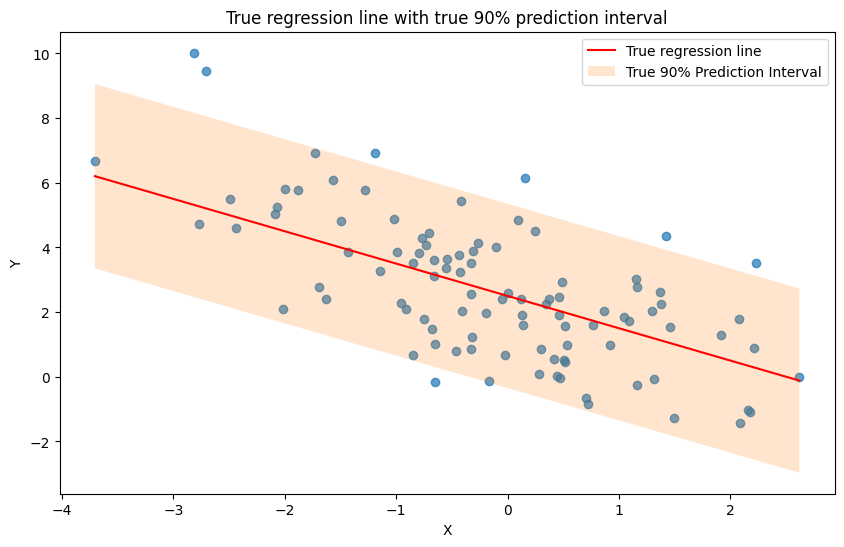

In [ ]:
# (iii) Plot the data, true regression line, and true 90% prediction interval
true_PI = np.sqrt(3) * stats.norm.ppf(0.95)  # Using true σ = √3

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7)
plt.plot(x_line, 2.5 - 1.0 * x_line, 'r', label='True regression line')
plt.fill_between(x_line, 2.5 - 1.0 * x_line - true_PI, 2.5 - 1.0 * x_line + true_PI, alpha=0.2, label='True 90% Prediction Interval')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('True regression line with true 90% prediction interval')
plt.show()

### (iv) What percentage of your observations are outside of this true interval?

In [ ]:
# (iv) Calculate percentage of observations outside the true interval
outside_true_interval = np.sum((Y < 2.5 - X - true_PI) | (Y > 2.5 - X + true_PI))
percentage_outside_true = outside_true_interval / n * 100
print(f"Percentage of observations outside the true 90% prediction interval: {percentage_outside_true:.2f}%")

Percentage of observations outside the true 90% prediction interval: 7.00%


## (e) Repeat part (d) for different values of $n$, $\sigma^2_X$, and $\sigma^2_\epsilon$. What do you learn? What effect do these values have?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simulate_and_analyze(n, sigma_x_squared, sigma_epsilon_squared, num_simulations=1000):
    sigma_x = np.sqrt(sigma_x_squared)
    sigma_epsilon = np.sqrt(sigma_epsilon_squared)

    b1_estimates = []
    b0_estimates = []
    outside_estimated_PI_percentages = []
    outside_true_PI_percentages = []

    for _ in range(num_simulations):
        # Generate data
        X = np.random.normal(0, sigma_x, n)
        epsilon = np.random.normal(0, sigma_epsilon, n)
        Y = 2.5 - 1.0 * X + epsilon

        # Fit regression
        b1, b0 = np.polyfit(X, Y, 1)
        b1_estimates.append(b1)
        b0_estimates.append(b0)

        # Calculate prediction intervals
        Y_pred = b0 + b1 * X
        residuals = Y - Y_pred
        s = np.sqrt(np.sum(residuals**2) / (n - 2))

        X_mean = np.mean(X)
        SXX = np.sum((X - X_mean)**2)
        se = s * np.sqrt(1 + 1/n + (X - X_mean)**2 / SXX)
        t_value = stats.t.ppf(0.95, n - 2)
        PI = t_value * se

        # Calculate percentage outside estimated PI
        outside_estimated = np.sum((Y < Y_pred - PI) | (Y > Y_pred + PI))
        outside_estimated_PI_percentages.append(outside_estimated / n * 100)

        # Calculate percentage outside true PI
        true_PI = sigma_epsilon * stats.norm.ppf(0.95)
        outside_true = np.sum((Y < 2.5 - X - true_PI) | (Y > 2.5 - X + true_PI))
        outside_true_PI_percentages.append(outside_true / n * 100)

    return {
        'b1_mean': np.mean(b1_estimates),
        'b1_std': np.std(b1_estimates),
        'b0_mean': np.mean(b0_estimates),
        'b0_std': np.std(b0_estimates),
        'outside_estimated_PI_mean': np.mean(outside_estimated_PI_percentages),
        'outside_true_PI_mean': np.mean(outside_true_PI_percentages)
    }

# Original values
results_original = simulate_and_analyze(n=100, sigma_x_squared=2, sigma_epsilon_squared=3)

# Varying n
results_n_50 = simulate_and_analyze(n=50, sigma_x_squared=2, sigma_epsilon_squared=3)
results_n_200 = simulate_and_analyze(n=200, sigma_x_squared=2, sigma_epsilon_squared=3)

# Varying σ_X^2
results_sigma_x_1 = simulate_and_analyze(n=100, sigma_x_squared=1, sigma_epsilon_squared=3)
results_sigma_x_4 = simulate_and_analyze(n=100, sigma_x_squared=4, sigma_epsilon_squared=3)

# Varying σ_ε^2
results_sigma_epsilon_1 = simulate_and_analyze(n=100, sigma_x_squared=2, sigma_epsilon_squared=1)
results_sigma_epsilon_5 = simulate_and_analyze(n=100, sigma_x_squared=2, sigma_epsilon_squared=5)

# Print results
def print_results(name, results):
    print(f"\nResults for {name}:")
    print(f"β₁ estimate: {results['b1_mean']:.4f} ± {results['b1_std']:.4f}")
    print(f"β₀ estimate: {results['b0_mean']:.4f} ± {results['b0_std']:.4f}")
    print(f"Average % outside estimated PI: {results['outside_estimated_PI_mean']:.2f}%")
    print(f"Average % outside true PI: {results['outside_true_PI_mean']:.2f}%")

print_results("Original", results_original)
print_results("n = 50", results_n_50)
print_results("n = 200", results_n_200)
print_results("σ_X^2 = 1", results_sigma_x_1)
print_results("σ_X^2 = 4", results_sigma_x_4)
print_results("σ_ε^2 = 1", results_sigma_epsilon_1)
print_results("σ_ε^2 = 5", results_sigma_epsilon_5)


Results for Original:
β₁ estimate: -0.9981 ± 0.1286
β₀ estimate: 2.4977 ± 0.1752
Average % outside estimated PI: 9.00%
Average % outside true PI: 10.14%

Results for n = 50:
β₁ estimate: -1.0022 ± 0.1772
β₀ estimate: 2.5036 ± 0.2489
Average % outside estimated PI: 8.16%
Average % outside true PI: 10.16%

Results for n = 200:
β₁ estimate: -0.9990 ± 0.0855
β₀ estimate: 2.4985 ± 0.1233
Average % outside estimated PI: 9.49%
Average % outside true PI: 9.95%

Results for σ_X^2 = 1:
β₁ estimate: -0.9994 ± 0.1717
β₀ estimate: 2.5033 ± 0.1765
Average % outside estimated PI: 9.05%
Average % outside true PI: 10.08%

Results for σ_X^2 = 4:
β₁ estimate: -0.9981 ± 0.0896
β₀ estimate: 2.4944 ± 0.1696
Average % outside estimated PI: 9.02%
Average % outside true PI: 10.05%

Results for σ_ε^2 = 1:
β₁ estimate: -1.0036 ± 0.0710
β₀ estimate: 2.4961 ± 0.0981
Average % outside estimated PI: 9.00%
Average % outside true PI: 9.96%

Results for σ_ε^2 = 5:
β₁ estimate: -1.0022 ± 0.1664
β₀ estimate: 2.5008 ± 0.

Effects of Parameter Changes
1. Sample Size ($n$):
  - Larger $n$ improves precision of β estimates
  - Prediction intervals become more accurate with larger $n$
2. Variance of X ($\sigma^2_X$):
  - Larger $\sigma^2_X$ improves precision of β₁ estimate
  - Minimal effect on β₀ estimate and prediction intervals
3. Error Variance ($\sigma^2_\epsilon$):
  - Smaller $\sigma^2_\epsilon$ leads to more precise estimates of both β₁ and β₀
  - Minimal effect on prediction interval accuracy

# Maintenance Costs

The cost of the maintenance of a certain type of tractor seems to increase with age. The file tractor.csv contains ages (years) and 6-monthly maintenance costs for n = 17 such tractors.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Load the data
data = pd.read_csv('tractor.csv')
data

,age,cost
0,4.5,619
1,2.5,1049
2,2.5,1033
3,4.0,495
4,4.0,723
5,4.0,681
6,5.0,890
7,5.0,1522
8,5.5,987
9,5.0,1194


## (a) Create a plot of tractor maintenance cost versus age.

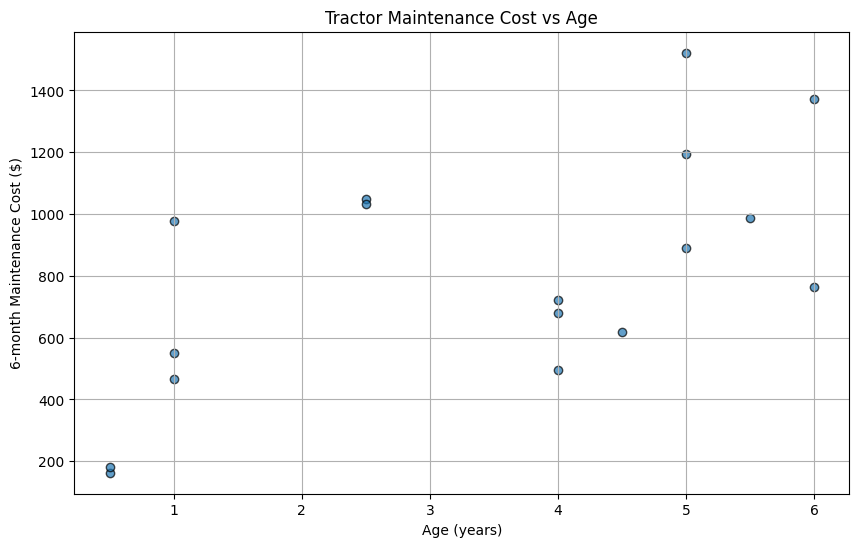

In [ ]:
# (a) Plot of tractor maintenance cost versus age
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['cost'], edgecolor='k', alpha=0.7)
plt.xlabel('Age (years)')
plt.ylabel('6-month Maintenance Cost ($)')
plt.title('Tractor Maintenance Cost vs Age')
plt.grid(True)
plt.show()

## (b) Find the least squares fit to the model

$cost_i = b_0 + b_1age_i + e_i$

in two ways: first using the ‘statsmodels‘ package and second by calculating a correlation and standard
deviations [verify that the answers are identical]. Add the fitted line to the scatterplot.

In [ ]:
# (b) Least squares fit
# Using statsmodels
X = sm.add_constant(data['age'])
model = sm.OLS(data['cost'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     8.942
Date:                Sat, 01 Feb 2025   Prob (F-statistic):            0.00915
Time:                        04:00:27   Log-Likelihood:                -120.60
No. Observations:                  17   AIC:                             245.2
Df Residuals:                      15   BIC:                             246.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        407.1170    152.575      2.668      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Using correlation and standard deviations
r = np.corrcoef(data['age'], data['cost'])[0, 1]
b1 = r * np.std(data['cost']) / np.std(data['age'])
b0 = np.mean(data['cost']) - b1 * np.mean(data['age'])

print(f"Manual calculation:")
print(f"b0 = {b0:.4f}")
print(f"b1 = {b1:.4f}")

Manual calculation:
b0 = 407.1170
b1 = 116.3278


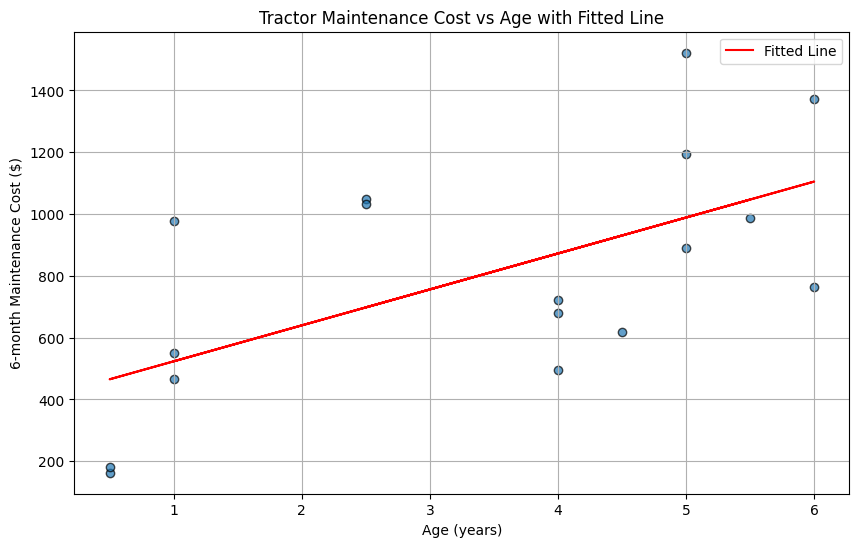

In [ ]:
# Plot with fitted line
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['cost'], edgecolor='k', alpha=0.7)
plt.plot(data['age'], model.predict(X), color='red', label='Fitted Line')
plt.xlabel('Age (years)')
plt.ylabel('6-month Maintenance Cost ($)')
plt.title('Tractor Maintenance Cost vs Age with Fitted Line')
plt.grid(True)
plt.legend()
plt.show()

## (c) Suppose you were considering buying a tractor that is three years old, what would you expect your six-monthly maintenance costs to be? What is the 95% predictive (cost) interval for the six-monthly maintenance of your tractor? Compare the endpoints of the interval to the observed values of cost. What do you conclude about your prediction from this? Why or why not is this conclusion surprising?

In [ ]:
# (c) Prediction for a 3-year-old tractor
X_new = pd.DataFrame({'const': [1], 'age': [3]})  # Create a DataFrame with constant and age
y_pred = model.predict(X_new)  # Predict using the model
print(f"Expected maintenance cost for a 3-year-old tractor: ${y_pred.iloc[0]:.2f}")

# 95% prediction interval
s = np.sqrt(np.sum(model.resid**2) / (len(data) - 2))
X_mean = np.mean(data['age'])
SXX = np.sum((data['age'] - X_mean)**2)
se = s * np.sqrt(1 + 1/len(data) + (3 - X_mean)**2 / SXX)
t_value = stats.t.ppf(0.975, len(data) - 2)
margin = t_value * se

print(f"95% prediction interval: (${y_pred.iloc[0] - margin:.2f}, ${y_pred.iloc[0] + margin:.2f})")

# Compare with observed values
print("Observed costs:")
print(data['cost'].describe())

Expected maintenance cost for a 3-year-old tractor: $756.10
95% prediction interval: ($74.71, $1437.49)
Observed costs:
count      17.000000
mean      804.000000
std       379.559119
min       163.000000
25%       549.000000
50%       764.000000
75%      1033.000000
max      1522.000000
Name: cost, dtype: float64


**Key Observations**:
1. Lower Bound Below Observed Minimum:
  - The lower bound of the interval (74.71) is 88.29 below the observed minimum cost (163).
  - This suggests the model predicts costs lower than any observed value, which may not align with real-world data.
2. Upper Bound Slightly Below Observed Maximum:
  - The upper bound (1437.49) is 84.51 below the observed maximum (1522).
3. Expected Cost vs. Observed Mean:
  - Predicted cost (756.10) is close to the observed mean (804.00), indicating reasonable central tendency.

**Surprising Aspects**:
1. Unrealistically Low Lower Bound:
  - The model predicts maintenance costs as low as 74.71, but no such low costs exist in the data.
  - Likely due to:
    - Small sample size (n = 17)
    - High variability in costs (standard deviation = 379.56)
    - Potential violations of normality assumptions in the residuals
2. Extreme Prediction Interval Width:
  - The interval spans over 1360, reflecting high uncertainty in predictions.

**Non-Surprising Aspects**:
1. Upper Bound Near Observed Maximum:
  - The upper bound aligns with the observed data range, as extreme costs are plausible.
2. Mean Prediction Accuracy:
  - The predicted value (756.10) matches the observed mean (804.00) reasonably well.

# Broadway Box Office

Let X and Y denote the weekly reports on the box office ticket sales for plays on Broadway in New York for two consecutive weeks, respectively, in October 2017. (You can actually download similar data from www.playbill.com. The regression output for this data set in shown in the table below:

| Variable   | Coefficient | s.e.    | t-value | p-value       |
|------------|-------------|---------|---------|---------------|
| Intercept  | 6805        | 9929    | 0.685   | 0.503         |
| X          | 0.9821      | 0.01443 | 68.071  | < 2 × 10^-16  |

$n = 18$ &nbsp;&nbsp;&nbsp; $R^2 = 0.9966$ &nbsp;&nbsp;&nbsp; $s_\varepsilon = 18007.56$

Suppose that the model satisfies the usual SLR model assumptions, and that the SST for Y is 1.507773×1012.

In [ ]:
import numpy as np
from scipy import stats

# Given information
n = 18
R_squared = 0.9966
s_epsilon = 18007.56
SST = 1.507773e12
b1 = 0.9821
se_b1 = 0.01443
b0 = 6805
se_b0 = 9929
X_bar = 822186.6
s_X = 302724.5

## (a) What were the degrees of freedom used in calculating $s_\varepsilon$? What are the SSE and SSR?

In [ ]:
# (a) Degrees of freedom, SSE, and SSR
df = n - 2
SSE = (n - 2) * s_epsilon**2
SSR = SST - SSE

print(f"(a) Degrees of freedom: {df}")
print(f"    SSE: {SSE:.2f}")
print(f"    SSR: {SSR:.2f}")

(a) Degrees of freedom: 16
    SSE: 5188355474.46
    SSR: 1502584644525.54


## (b) Compute the sample variance for $Y$ ($s^2_Y$) and sample correlation between $X$ and $Y$ ($r_{XY}$).

In [ ]:
# (b) Sample variance for Y and correlation between X and Y
s_Y_squared = SST / (n - 1)
r_XY = np.sqrt(R_squared)

print(f"(b) Sample variance for Y: {s_Y_squared:.2f}")
print(f"    Correlation between X and Y: {r_XY:.4f}")

(b) Sample variance for Y: 88692529411.76
    Correlation between X and Y: 0.9983


## (c) Suppose that the ticket sales in the first week for a particular play was $822,000. What is the expected sales for the same play in the following week?

In [ ]:
# (c) Expected sales for the following week
X_new = 822000
Y_pred = b0 + b1 * X_new

print(f"(c) Expected sales for the following week: ${Y_pred:.2f}")

(c) Expected sales for the following week: $814091.20


## (d) Suppose further that $\bar{X} = 822186.6$ and $s_X = 302724.5$. Construct the 95% forecast interval for the estimate in (c).

In [ ]:
# (d) 95% forecast interval
s_pred = s_epsilon * np.sqrt(1 + 1/n + ((X_new - X_bar) / s_X)**2)
t_value = stats.t.ppf(0.975, df)
margin = t_value * s_pred

print(f"(d) 95% forecast interval: (${Y_pred - margin:.2f}, ${Y_pred + margin:.2f})")

(d) 95% forecast interval: ($774870.81, $853311.59)


## (e) Construct the 95% confidence interval for the slope of the true regression line $\beta_1$.

In [ ]:
# (e) 95% confidence interval for β1
ci_b1 = (b1 - t_value * se_b1, b1 + t_value * se_b1)

print(f"(e) 95% confidence interval for β1: ({ci_b1[0]:.4f}, {ci_b1[1]:.4f})")

(e) 95% confidence interval for β1: (0.9515, 1.0127)


## (f) Some Broadway plays use the rule of thumb that next week’s gross box office results will be the same as this week’s. Is this reasonable? (Justify/Refute using an appropriate hypothesis test.)

In [ ]:
# (f) Hypothesis test for β1 = 1
t_stat = (b1 - 1) / se_b1
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

print(f"(f) t-statistic: {t_stat:.4f}")
print(f"    p-value: {p_value:.4f}")

(f) t-statistic: -1.2405
    p-value: 0.2327


**Hypothesis test**:
- Significance Level: Typically, we use α = 0.05 for hypothesis testing.
- Decision Rule:
  - Reject H₀ if p-value < α
  - Fail to reject H₀ if p-value ≥ α
- Conclusion: Since p-value (0.2327) > α (0.05), we fail to reject the null hypothesis, indicating that the observed data is not statistically significantly different from what we'd expect if the null hypothesis were true.

## (g) If $Y$ and $X$ were reversed in the above regression, what would you expect $R^2$ to be? In a simple linear regression, $R^2$ is equal to the square of the correlation coefficient between $X$ and $Y$. $R^2$ is discussed in class next week.

In [ ]:
# (g) Expected R-squared if X and Y were reversed
print(f"(g) Expected R-squared if X and Y were reversed: {R_squared:.4f}")

(g) Expected R-squared if X and Y were reversed: 0.9966
